<a href="https://colab.research.google.com/github/chaoszd/PandasProject/blob/main/SpaceTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df1=pd.read_csv('train (2).csv')
df2=pd.read_csv('test (2).csv')
df1.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
new=df1.PassengerId.str.split('_',n=1,expand=True)
df1['First data']=new[1]
df1['First data']=pd.to_numeric(df1['First data'])
new=df2.PassengerId.str.split('_',n=1,expand=True)
df2['First data']=new[1]
df2['First data']=pd.to_numeric(df2['First data'])

In [ ]:
df1.drop('PassengerId',axis=1,inplace=True)
df2.drop('PassengerId',axis=1,inplace=True)

<Axes: xlabel='HomePlanet', ylabel='Transported'>

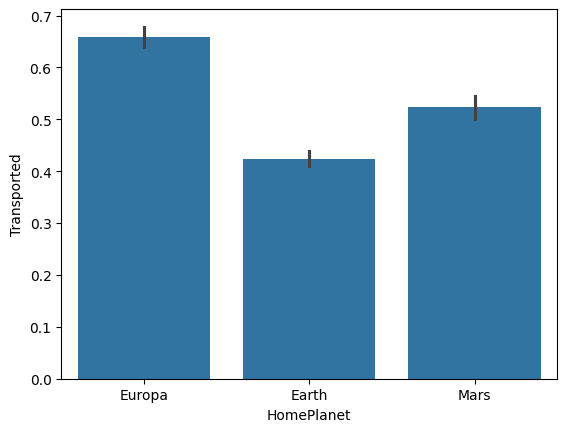

In [ ]:
sns.barplot(x='HomePlanet',y='Transported',data=df1)

In [ ]:
df1.HomePlanet=df1.HomePlanet.apply(lambda x: 2 if x=='Europa' else(1 if x=='Mars' else 0))
df2.HomePlanet=df2.HomePlanet.apply(lambda x: 2 if x=='Europa' else(1 if x=='Mars' else 0))


(array([7.848e+03, 2.660e+02, 1.720e+02, 7.800e+01, 4.700e+01, 3.300e+01,
        2.100e+01, 1.300e+01, 8.000e+00, 7.000e+00, 3.000e+00, 6.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00]),
 array([    0.  ,  1490.65,  2981.3 ,  4471.95,  5962.6 ,  7453.25,
         8943.9 , 10434.55, 11925.2 , 13415.85, 14906.5 , 16397.15,
        17887.8 , 19378.45, 20869.1 , 22359.75, 23850.4 , 25341.05,
        26831.7 , 28322.35, 29813.  ]),
 <BarContainer object of 20 artists>)

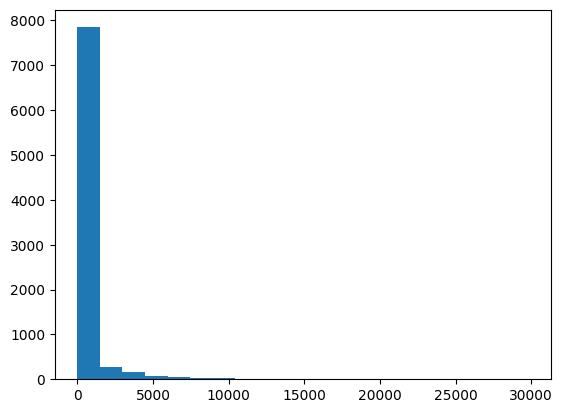

In [ ]:
plt.hist(df1.FoodCourt,bins=20)

<Axes: xlabel='Destination', ylabel='Transported'>

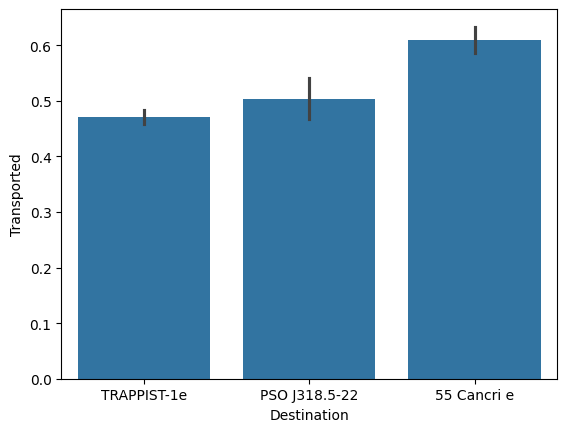

In [ ]:
sns.barplot(x='Destination',y='Transported',data=df1)

In [ ]:
df1.groupby('Destination').mean('Age')
df1.Destination=df1.Destination.fillna(df1.HomePlanet.apply(lambda x: 0 if x==0 else(1 if x==1 else 2)))
df2.Destination=df2.Destination.fillna(df2.HomePlanet.apply(lambda x: 0 if x==0 else(1 if x==1 else 2)))

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df1[['Destination']]=ordinal_encoder.fit_transform(df1[['Destination']])
df2[['Destination']]=ordinal_encoder.fit_transform(df2[['Destination']])


In [ ]:
new1=df1.Cabin.str.split('/',n=2,expand=True)
df1.Cabin=new1[2]
new1=df2.Cabin.str.split('/',n=2,expand=True)
df2.Cabin=new1[2]

(array([8.156e+03, 2.540e+02, 6.500e+01, 1.700e+01, 9.000e+00, 9.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  1432.7,  2865.4,  4298.1,  5730.8,  7163.5,  8596.2,
        10028.9, 11461.6, 12894.3, 14327. ]),
 <BarContainer object of 10 artists>)

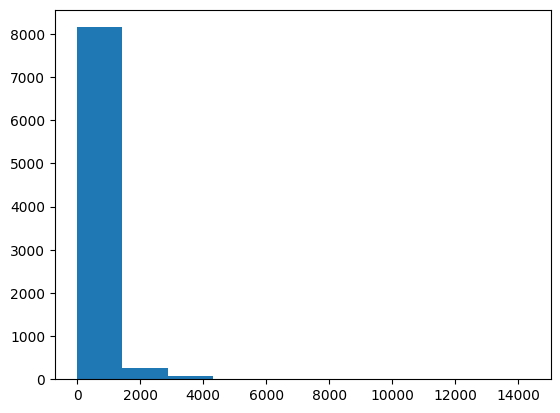

In [ ]:
plt.hist(df1.RoomService)

In [ ]:
j=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
for a in j:
    df1[a]=df1[a].fillna(df1[a].median())
    df2[a]=df2[a].fillna(df2[a].median() )

In [ ]:
df1.isna().sum()

HomePlanet        0
CryoSleep       217
Cabin           199
Destination       0
Age             179
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
First data        0
dtype: int64

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
df1[['CryoSleep','VIP']]=ordinal_encoder.fit_transform(df1[['CryoSleep','VIP']])
df1[['Cabin','Transported','First data']]=ordinal_encoder.fit_transform(df1[['Cabin','Transported','First data']])

df2[['CryoSleep','VIP']]=ordinal_encoder.fit_transform(df2[['CryoSleep','VIP']])
df2[['Cabin','First data']]=ordinal_encoder.fit_transform(df2[['Cabin','First data']])



In [ ]:
df1.groupby('HomePlanet').mean('Age')

,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First data
HomePlanet,,,,,,,,,,,,
0,0.31086,0.497448,1.505309,26.183323,0.001067,136.505934,139.596294,130.873621,143.417656,141.023943,0.427649,0.448678
1,0.38986,0.484321,1.728823,29.297203,0.036713,541.581580,53.187607,302.133030,107.965890,46.388857,0.523024,0.485503
2,0.43946,0.538647,1.159550,34.419664,0.062709,142.778508,1470.764430,147.374003,830.147349,860.560300,0.658846,0.700141


In [ ]:
bla=[df1[df1.HomePlanet==0].Age.mean(),df1[df1.HomePlanet==2].Age.mean(),df1[df1.HomePlanet==1].Age.mean()]
df1.Age=df1.Age.fillna(df1.HomePlanet.apply(lambda x: (bla[0] if x==0 else(bla[1] if x==2 else bla[2]))))
bla2=[df2[df2.HomePlanet==0].Age.mean(),df2[df2.HomePlanet==2].Age.mean(),df2[df2.HomePlanet==1].Age.mean()]
df2.Age=df2.Age.fillna(df2.HomePlanet.apply(lambda x: (bla2[0] if x==0 else(bla2[1] if x==2 else bla2[2]))))

In [ ]:
#second variant for destination
df1=pd.get_dummies(df1,columns=['Destination'],dtype='int')
df2=pd.get_dummies(df2,columns=['Destination'],dtype='int')


In [ ]:
df1.drop('Name',axis=1,inplace=True)
df2.drop('Name',axis=1,inplace=True)

In [ ]:
df1.groupby('VIP').mean('Age')

,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,First data
VIP,,,,,,,,,,,,
0.0,0.671692,0.363805,0.505059,1.471716,28.649374,212.686045,417.440598,169.702931,295.197202,276.477868,0.506332,0.518273
1.0,1.633166,0.107143,0.471503,1.256281,37.408529,464.095477,1756.778894,241.502513,753.065327,1210.035176,0.381910,0.522613


In [ ]:
df1.VIP.fillna(df1.Age.apply(lambda x: 1 if x>df1['Age'].mean() else 0),inplace=True)
df2.VIP.fillna(df2.Age.apply(lambda x: 1 if x>df1['Age'].mean() else 0),inplace=True)

In [ ]:

df1.isna().sum()

HomePlanet        0
CryoSleep       217
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
First data        0
dtype: int64

In [ ]:
df1.Cabin.fillna(np.random.randint(0,1),inplace=True)
df2.Cabin.fillna(np.random.randint(0,1),inplace=True)
df1.CryoSleep.fillna(np.random.randint(0,1),inplace=True)
df2.CryoSleep.fillna(np.random.randint(0,1),inplace=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
  vif=pd.DataFrame()
  vif["variables"]=z.columns
  vif["vif"]=[variance_inflation_factor(z.values,i) for i in range(z.shape[1])]
  return(vif)
nino4=df1.drop(['Transported'],axis=1)

z=nino4.iloc[:,0:16]
calc_vif(z)

,variables,vif
0,HomePlanet,2.319307
1,CryoSleep,1.846019
2,Cabin,1.817744
3,Destination,2.875089
4,Age,3.780027
5,VIP,1.081327
6,RoomService,1.199125
7,FoodCourt,1.329834
8,ShoppingMall,1.127268
9,Spa,1.217927


In [ ]:
X=df1.drop(['Transported'],axis=1)
y=df1.Transported

In [ ]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
X=pd.DataFrame(object.fit_transform(X))
df2=pd.DataFrame(object.transform(df2))


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.22, random_state = 101)
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predcitions=logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
print(classification_report(y_test,predcitions))

              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       969
         1.0       0.78      0.83      0.81       944

    accuracy                           0.80      1913
   macro avg       0.80      0.80      0.80      1913
weighted avg       0.80      0.80      0.80      1913



In [ ]:
print(accuracy_score(y_test,predcitions))

0.8013591217982227


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_knn)

77.37


In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_svc)

78.93


In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
acc_randomforest = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_randomforest)

77.99


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
y_pred = gbk.predict(X_test)
acc_gbk = round(accuracy_score(y_pred, y_test) * 100, 2)
print(acc_gbk)

79.72


In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(eval_metric='logloss')
xgb_classifier.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.7919498170412964

In [ ]:
predictions = logmodel.predict(df2)
len(predictions)

4277

In [ ]:
df2.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
First data      0
dtype: int64

In [ ]:
bla2=pd.read_csv('test (2).csv')

ids=bla2.PassengerId
ids

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [ ]:
output = pd.DataFrame({ 'PassengerId' : ids, 'Transported': predictions })
output.Transported=output.Transported.apply(lambda x: False if x==0.00 else True)
output

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [ ]:
output.to_csv('Submission.csv',index=False)